# Análise de dados do desempenho de alunos em Introdução à Programação

Dados extraídos através de um robô no Moodle USP das disciplinas de MAC 2166 (2020, 2021 e 2022) e MAC 110 (2022)

## Importação da base

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [3]:
df = pd.read_excel('/Users/mcorradini/Desktop/TCC/Notebook/data_exported_all.xlsx')

Total: 11315 linhas

In [4]:
df['Exercício'] = df['Exercício'].str.lower()
df['Nota'] = df['Nota'].str.split('/').str[0]
df['Nota'] = df['Nota'].str.replace('Nenhuma nota', '')
df['Nota'] = df['Nota'].str.replace(' ', '')
df['Nota'] = df['Nota'].str.replace(',', '.')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11315 entries, 0 to 11314
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ano                   11315 non-null  int64  
 1   Exercício             11315 non-null  object 
 2   Id aluno              11315 non-null  int64  
 3   Nota                  11196 non-null  object 
 4   Número de submissões  11307 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 442.1+ KB


In [5]:
df.head(5)

,Ano,Exercício,Id aluno,Nota,Número de submissões
0,2022,13.2. introdução às matrizes imprimir linhas e...,1,0.00,5.0
1,2022,ler dois valores a e b e imprimir o quadrado d...,1,10.00,2.0
2,2022,11_saw.xlsx,1,10.00,1.0
3,2022,matrizes imprimir linhas e soma da linha,1,10.00,9.0
4,2022,computando médias de colunas de matriz,1,10.00,7.0


### Entendendo o tamanho da base

In [6]:
print('Número de anos disponíveis: ',  df['Ano'].unique().size)

Número de anos disponíveis:  3


In [7]:
print('Número de exercícios distintos: ',  df['Exercício'].unique().size)
print('\nNúmero de registros por exercício:')
df_ex_aux = pd.DataFrame(df['Exercício'].value_counts())
df_ex_aux

Número de exercícios distintos:  104

Número de registros por exercício:


,Exercício
operador resto da divisão,646
ler número inteiro int e imprimir seu quadrado,430
ler dois valores a e b e imprimir o quadrado de a - b,428
ler dois valores inteiros int e imprimir sua soma,427
ler dois inteiros e imprimir o maior,359
...,...
"7""",1
"21""",1
15.4. transformação linear e identidade vetorial via vetor de índices da base opcional.xlsx,1
"28""",1


In [8]:
print('Número de alunos: ',  df['Id aluno'].unique().size)

Número de alunos:  270


In [9]:
df['Nota'] = pd.to_numeric(df['Nota'],errors='coerce')
print('Menor nota: ',  df['Nota'].min())
print('Maior nota: ',  df['Nota'].max())

Menor nota:  0.0
Maior nota:  10.0


Menor número de submissões:  1.0
Maior número de submissões:  143.0


[Text(0.5, 1.0, 'Frequência de submissões')]

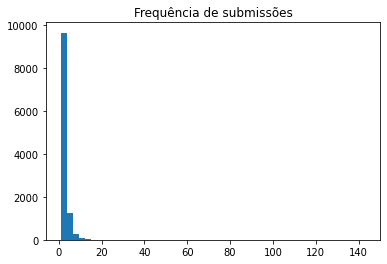

In [10]:
print('Menor número de submissões: ',  df['Número de submissões'].min())
print('Maior número de submissões: ',  df['Número de submissões'].max())
plt.hist(df['Número de submissões'], bins=50)
plt.gca().set(title='Frequência de submissões')

#### Diminuindo o range para entender melhor a distribuição

[Text(0.5, 1.0, 'Frequência de submissões')]

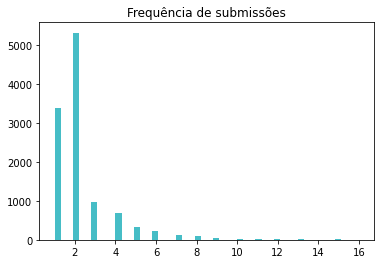

In [63]:
plt.hist(df['Número de submissões'], bins=50, range=[1, 16], color = '#46bdc6')
plt.gca().set(title='Frequência de submissões')

### Classificar com alunos

In [12]:
classificacao = []
#Vetores e matrizes
for row in df['Exercício']:
    if 'vetor' in row : classificacao.append(1)
    elif 'matriz' in row : classificacao.append(1)
    else: classificacao.append(0)
df['vetor_matriz'] = classificacao

#Funções
classificacao = []
for row in df['Exercício']:
    if 'função' in row : classificacao.append(1)
    elif 'funções' in row : classificacao.append(1)
    else: classificacao.append(0)
df['funcao'] = classificacao

#Entrada e saída
classificacao = []
for row in df['Exercício']:
    if 'imprim' in row : classificacao.append(1)
    elif 'dado' in row : classificacao.append(1)
    elif 'dada' in row : classificacao.append(1)
    elif 'ler' in row : classificacao.append(1)
    else: classificacao.append(0)
df['in_out'] = classificacao

#Laços de repetição
classificacao = []
for row in df['Exercício']:
    if 'laço' in row : classificacao.append(1)
    else: classificacao.append(0)
df['repeticao'] = classificacao

#Laços condicionais
classificacao = []
for row in df['Exercício']:
    if 'se' in row : classificacao.append(1)
    elif 'verificar' in row : classificacao.append(1)
    else: classificacao.append(0)
df['cond'] = classificacao

#Conversão de variável
classificacao = []
for row in df['Exercício']:
    if 'converter' in row : classificacao.append(1)
    elif 'dígitos' in row : classificacao.append(1)
    else: classificacao.append(0)
df['conversao_var'] = classificacao

#Teste
classificacao = []
for row in df['Exercício']:
    if 'teste' in row : classificacao.append(1)
    elif 'testar' in row : classificacao.append(1)
    else: classificacao.append(0)
df['teste'] = classificacao

## Resumindo exercícios por média, moda e mediana de nota e de número submissões

In [13]:
#Número de submissões total por exercício
ex_count = df['Exercício'].value_counts()
ex_count.columns = ['Exercício', 'Número respostas']

In [14]:
#Média de nota
ex_mean = df.groupby(['Exercício'])['Nota'].mean()
ex_mean.columns = ['Exercício', 'Média nota']

#Média de submissões
ex_mean_sub = df.groupby(['Exercício'])['Número de submissões'].mean()
ex_mean_sub.columns = ['Exercício', 'Média submissões']

In [15]:
#Mediana de nota
ex_median = df.groupby(['Exercício'])['Nota'].median()
ex_median.columns = ['Exercício', 'Mediana nota']

#Mediana de submissões
ex_median_sub = df.groupby(['Exercício'])['Número de submissões'].median()
ex_median_sub.columns = ['Exercício', 'Mediana submissões']

In [16]:
#Moda de nota
ex_mode = df.groupby(['Exercício']) ['Nota'].agg(pd.Series.mode)
ex_mode.columns = ['Exercício', 'Moda nota']

#Moda de submissões
ex_mode_sub = df.groupby(['Exercício']) ['Número de submissões'].agg(pd.Series.mode)
ex_mode_sub.columns = ['Exercício', 'Moda submissões']

In [17]:
#Join de todos os parâmetros encontrados
ex_sum = pd.concat([ex_count, ex_mean, ex_median, ex_mode, ex_mean_sub, ex_median_sub, ex_mode_sub], axis=1, join="inner")
ex_sum = ex_sum.reset_index()
ex_sum.columns = ['Ex', 'Freq sub', 'Média nota', 'Mediana nota', 'Moda nota', 'Média sub', 'Mediana sub', 'Moda sub']

In [18]:
#Filtrar linhas sem submissões
ex_sum_filter = pd.DataFrame()
ex_sum_filter = ex_sum[ex_sum['Média sub'] >= 1]
ex_sum_filter 

,Ex,Freq sub,Média nota,Mediana nota,Moda nota,Média sub,Mediana sub,Moda sub
0,operador resto da divisão,646,9.862776,10.0,10.0,1.500000,1.0,1.0
1,ler número inteiro int e imprimir seu quadrado,430,9.950000,10.0,10.0,1.741860,2.0,1.0
2,ler dois valores a e b e imprimir o quadrado d...,428,9.983452,10.0,10.0,1.467290,1.0,1.0
3,ler dois valores inteiros int e imprimir sua ...,427,9.976303,10.0,10.0,1.414520,1.0,1.0
4,ler dois inteiros e imprimir o maior,359,9.954674,10.0,10.0,1.685237,2.0,2.0
...,...,...,...,...,...,...,...,...
95,15.2. dado n inteiro e x real computar aproxim...,7,9.690000,10.0,10.0,2.000000,2.0,2.0
96,14.2. ler e imprimir um arquivo com matriz de ...,6,6.000000,10.0,10.0,2.666667,2.0,"[1.0, 2.0, 5.0]"
97,13.2. introdução às matrizes imprimir linhas e...,6,6.666667,10.0,10.0,6.000000,2.5,2.0
98,11_saw.xlsx,4,5.000000,5.0,"[0.0, 10.0]",7.000000,7.5,"[1.0, 4.0, 11.0, 12.0]"


In [72]:
print('Menor média de nota: ',  ex_sum_filter['Média nota'].min())
print('Maior média de nota: ',  ex_sum_filter['Média nota'].max())
print('Menor número médio de submissões: ',  ex_sum_filter['Média sub'].min())
print('Maior número médio de submissões: ',  ex_sum_filter['Média sub'].max())
print('Média de nota: ',  ex_sum_filter['Média nota'].mean())
print('Média de submissões: ',  ex_sum_filter['Média sub'].mean())
print('Mediana de nota: ',  ex_sum_filter['Média nota'].median())
print('Mediana de submissões: ',  ex_sum_filter['Média sub'].median())
print('Moda de nota: ',  ex_sum_filter['Média nota'].agg(pd.Series.mode))
print('Moda de submissões: ',  ex_sum_filter['Média sub'].agg(pd.Series.mode))



#[df.loc[df['vetor_matriz'] == 1, 'Número de submissões'].agg(pd.Series.mode)

Menor média de nota:  0.8333333333333334
Maior média de nota:  10.0
Menor número médio de submissões:  1.3833333333333333
Maior número médio de submissões:  7.0
Média de nota:  7.946373574899201
Média de submissões:  2.742591416646585
Mediana de nota:  8.16
Mediana de submissões:  2.582905466626397
Moda de nota:  0    10.0
dtype: float64
Moda de submissões:  0    2.000000
1    2.666667
dtype: float64


[Text(0.5, 1.0, 'Média nota')]

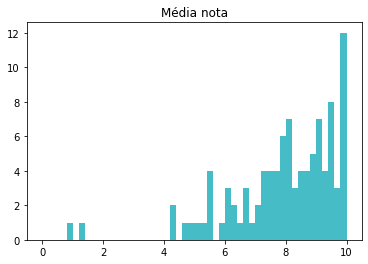

In [64]:
plt.hist(ex_sum_filter['Média nota'], bins=50, range=[0, 10], color = '#46bdc6')
plt.gca().set(title='Média nota')

[Text(0.5, 1.0, 'Média sub')]

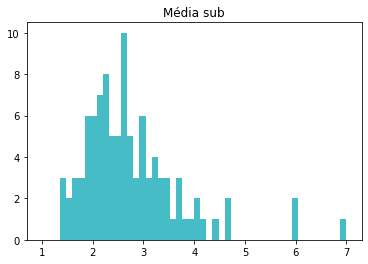

In [65]:
plt.hist(ex_sum_filter['Média sub'], bins=50, range=[1, 7], color = '#46bdc6')
plt.gca().set(title='Média sub')

[Text(0.5, 1.0, 'Mediana nota')]

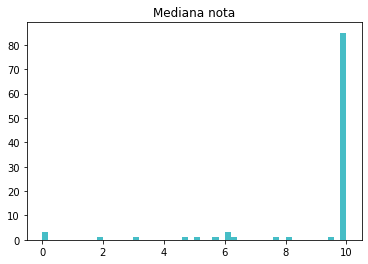

In [73]:
plt.hist(ex_sum_filter['Mediana nota'], bins=50, range=[0, 10], color = '#46bdc6')
plt.gca().set(title='Mediana nota')

[Text(0.5, 1.0, 'Mediana sub')]

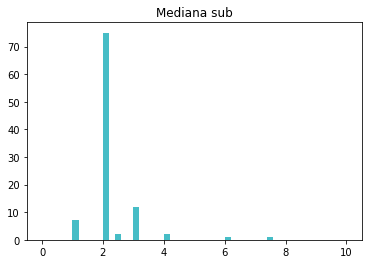

In [74]:
plt.hist(ex_sum_filter['Mediana sub'], bins=50, range=[0, 10], color = '#46bdc6')
plt.gca().set(title='Mediana sub')

[Text(0.5, 1.0, 'Moda nota')]

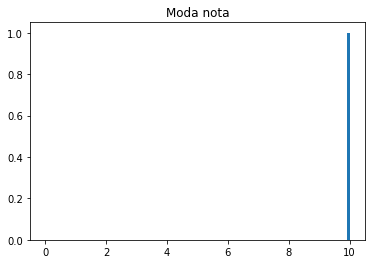

In [133]:
#print(ex_sum_filter['Moda nota'])
#ex_sum_filter.filter(size(col('Moda nota')) > 1).show(false)
#ex_sum_filter['Moda nota'].size()
#ex_moda = ex_sum_filter.loc[ex_sum_filter['Moda nota'].size() > 1]
#ex_moda
#counts, bins = np.histogram(ex_sum_filter['Moda nota'].all())
#plt.hist(bins[:-1], bins, weights=counts)
plt.hist(ex_sum_filter['Moda nota'].any(), bins=100, range=[0, 10])
plt.gca().set(title='Moda nota')

[Text(0.5, 1.0, 'Moda sub')]

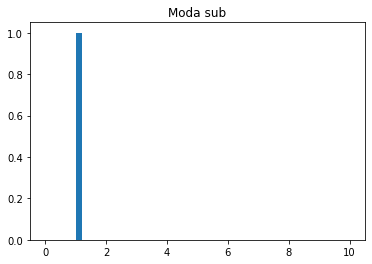

In [137]:
plt.hist(ex_sum_filter['Moda sub'].any(), bins=50, range=[0, 10])
plt.gca().set(title='Moda sub')

## Classificando os exercícios

In [26]:
classificacao = []
df_ex = pd.DataFrame()
df_ex = ex_sum_filter
#Vetores e matrizes
for row in df_ex['Ex']:
    if 'vetor' in row : classificacao.append(1)
    elif 'matriz' in row : classificacao.append(1)
    else: classificacao.append(0)
df_ex.insert(6, 'vetor_matriz', classificacao, True) 

#Funções
classificacao = []
for row in df_ex['Ex']:
    if 'função' in row : classificacao.append(1)
    elif 'funções' in row : classificacao.append(1)
    else: classificacao.append(0)
df_ex.insert(7, 'funcao', classificacao, True) 

#Entrada e saída
classificacao = []
for row in df_ex['Ex']:
    if 'imprim' in row : classificacao.append(1)
    elif 'dado' in row : classificacao.append(1)
    elif 'dada' in row : classificacao.append(1)
    elif 'ler' in row : classificacao.append(1)
    else: classificacao.append(0)
df_ex.insert(8, 'in_out', classificacao, True) 

#Laços de repetição
classificacao = []
for row in df_ex['Ex']:
    if 'laço' in row : classificacao.append(1)
    else: classificacao.append(0)
df_ex.insert(9, 'repeticao', classificacao, True) 

#Laços condicionais
classificacao = []
for row in df_ex['Ex']:
    if 'se' in row : classificacao.append(1)
    elif 'verificar' in row : classificacao.append(1)
    else: classificacao.append(0)
df_ex.insert(10, 'cond', classificacao, True) 

#Conversão de variável
classificacao = []
for row in df_ex['Ex']:
    if 'converter' in row : classificacao.append(1)
    elif 'dígitos' in row : classificacao.append(1)
    else: classificacao.append(0)
df_ex.insert(11, 'conversao_var', classificacao, True) 

#Teste
classificacao = []
for row in df_ex['Ex']:
    if 'teste' in row : classificacao.append(1)
    elif 'testar' in row : classificacao.append(1)
    else: classificacao.append(0)
df_ex.insert(12, 'teste', classificacao, True) 

In [27]:
df_ex

,Ex,Freq sub,Média nota,Mediana nota,Moda nota,Média sub,vetor_matriz,funcao,in_out,repeticao,cond,conversao_var,teste,Mediana sub,Moda sub
0,operador resto da divisão,646,9.862776,10.0,10.0,1.500000,0,0,0,0,0,0,0,1.0,1.0
1,ler número inteiro int e imprimir seu quadrado,430,9.950000,10.0,10.0,1.741860,0,0,1,0,1,0,0,2.0,1.0
2,ler dois valores a e b e imprimir o quadrado d...,428,9.983452,10.0,10.0,1.467290,0,0,1,0,0,0,0,1.0,1.0
3,ler dois valores inteiros int e imprimir sua ...,427,9.976303,10.0,10.0,1.414520,0,0,1,0,0,0,0,1.0,1.0
4,ler dois inteiros e imprimir o maior,359,9.954674,10.0,10.0,1.685237,0,0,1,0,0,0,0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,15.2. dado n inteiro e x real computar aproxim...,7,9.690000,10.0,10.0,2.000000,0,0,1,0,1,0,0,2.0,2.0
96,14.2. ler e imprimir um arquivo com matriz de ...,6,6.000000,10.0,10.0,2.666667,1,0,1,0,0,0,0,2.0,"[1.0, 2.0, 5.0]"
97,13.2. introdução às matrizes imprimir linhas e...,6,6.666667,10.0,10.0,6.000000,1,0,1,0,0,0,0,2.5,2.0
98,11_saw.xlsx,4,5.000000,5.0,"[0.0, 10.0]",7.000000,0,0,0,0,0,0,0,7.5,"[1.0, 4.0, 11.0, 12.0]"


### Por tema dos exercícios

In [28]:
lista = [['Vetor_matriz', 
          'Teste', 
          'Funcao', 
          'Conversao de variavel', 
          'Repeticao', 
          'Condicional', 
          'Entrada saida'],
         #média
         [df.loc[df['vetor_matriz'] == 1, 'Número de submissões'].mean(),
         df.loc[df['teste'] == 1, 'Número de submissões'].mean(),
         df.loc[df['funcao'] == 1, 'Número de submissões'].mean(),
         df.loc[df['conversao_var'] == 1, 'Número de submissões'].mean(),
         df.loc[df['repeticao'] == 1, 'Número de submissões'].mean(),
         df.loc[df['cond'] == 1, 'Número de submissões'].mean(),
         df.loc[df['in_out'] == 1, 'Número de submissões'].mean()],
         [df.loc[df['vetor_matriz'] == 1, 'Nota'].mean(),
         df.loc[df['teste'] == 1, 'Nota'].mean(),
         df.loc[df['funcao'] == 1, 'Nota'].mean(),
         df.loc[df['conversao_var'] == 1, 'Nota'].mean(),
         df.loc[df['repeticao'] == 1, 'Nota'].mean(),
         df.loc[df['cond'] == 1, 'Nota'].mean(),
         df.loc[df['in_out'] == 1, 'Nota'].mean()],
         #mediana
         [df.loc[df['vetor_matriz'] == 1, 'Número de submissões'].median(),
         df.loc[df['teste'] == 1, 'Número de submissões'].median(),
         df.loc[df['funcao'] == 1, 'Número de submissões'].median(),
         df.loc[df['conversao_var'] == 1, 'Número de submissões'].median(),
         df.loc[df['repeticao'] == 1, 'Número de submissões'].median(),
         df.loc[df['cond'] == 1, 'Número de submissões'].median(),
         df.loc[df['in_out'] == 1, 'Número de submissões'].median()],
         [df.loc[df['vetor_matriz'] == 1, 'Nota'].median(),
         df.loc[df['teste'] == 1, 'Nota'].median(),
         df.loc[df['funcao'] == 1, 'Nota'].median(),
         df.loc[df['conversao_var'] == 1, 'Nota'].median(),
         df.loc[df['repeticao'] == 1, 'Nota'].median(),
         df.loc[df['cond'] == 1, 'Nota'].median(),
         df.loc[df['in_out'] == 1, 'Nota'].median()],
         #moda
         [df.loc[df['vetor_matriz'] == 1, 'Número de submissões'].agg(pd.Series.mode),
         df.loc[df['teste'] == 1, 'Número de submissões'].agg(pd.Series.mode),
         df.loc[df['funcao'] == 1, 'Número de submissões'].agg(pd.Series.mode),
         df.loc[df['conversao_var'] == 1, 'Número de submissões'].agg(pd.Series.mode),
         df.loc[df['repeticao'] == 1, 'Número de submissões'].agg(pd.Series.mode),
         df.loc[df['cond'] == 1, 'Número de submissões'].agg(pd.Series.mode),
         df.loc[df['in_out'] == 1, 'Número de submissões'].agg(pd.Series.mode)],
         [df.loc[df['vetor_matriz'] == 1, 'Nota'].agg(pd.Series.mode),
         df.loc[df['teste'] == 1, 'Nota'].agg(pd.Series.mode),
         df.loc[df['funcao'] == 1, 'Nota'].agg(pd.Series.mode),
         df.loc[df['conversao_var'] == 1, 'Nota'].agg(pd.Series.mode),
         df.loc[df['repeticao'] == 1, 'Nota'].agg(pd.Series.mode),
         df.loc[df['cond'] == 1, 'Nota'].agg(pd.Series.mode),
         df.loc[df['in_out'] == 1, 'Nota'].agg(pd.Series.mode)]
        ]
df_assunto = pd.DataFrame (lista).transpose()
df_assunto.columns = ['Assunto', 'Média submissões', 'Média nota', 'Mediana submissões', 'Mediana nota', 'Moda submissões', 'Moda nota']
df_assunto


,Assunto,Média submissões,Média nota,Mediana submissões,Mediana nota,Moda submissões,Moda nota
0,Vetor_matriz,3.424759,7.359682,2.0,10.0,0 2.0 dtype: float64,0 10.0 dtype: float64
1,Teste,2.666667,8.076087,2.0,10.0,0 2.0 dtype: float64,0 10.0 dtype: float64
2,Funcao,2.623175,8.781078,2.0,10.0,0 2.0 dtype: float64,0 10.0 dtype: float64
3,Conversao de variavel,2.581114,8.638298,2.0,10.0,0 2.0 dtype: float64,0 10.0 dtype: float64
4,Repeticao,2.48834,8.646289,2.0,10.0,0 2.0 dtype: float64,0 10.0 dtype: float64
5,Condicional,2.493837,8.665276,2.0,10.0,0 2.0 dtype: float64,0 10.0 dtype: float64
6,Entrada saida,2.185714,8.993502,2.0,10.0,0 2.0 dtype: float64,0 10.0 dtype: float64


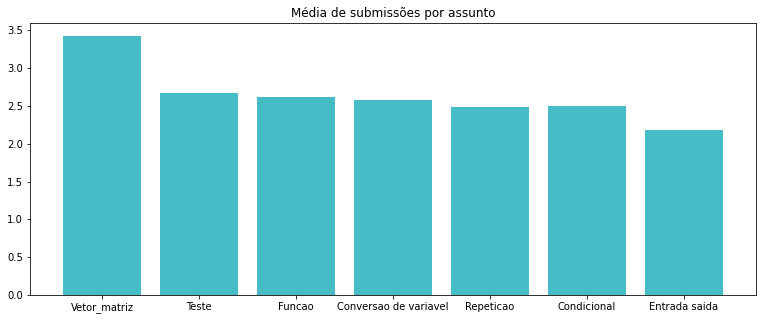

In [80]:
f, ax = plt.subplots(figsize=(13,5))
plt.bar(df_assunto['Assunto'], df_assunto['Média submissões'], color = '#46bdc6')
plt.title('Média de submissões por assunto')
plt.show()

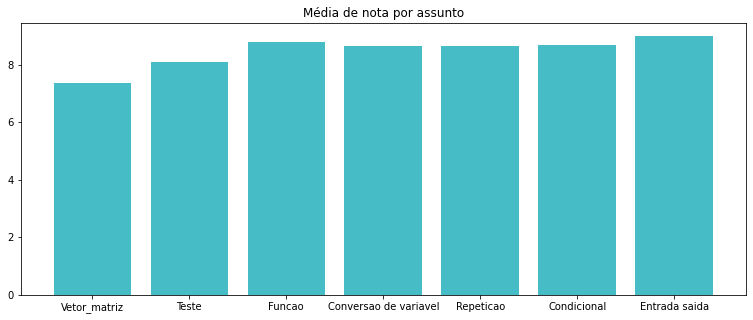

In [82]:
f, ax = plt.subplots(figsize=(13,5))
plt.bar(df_assunto['Assunto'], df_assunto['Média nota'], color = '#46bdc6')
plt.title('Média de nota por assunto')
plt.show()

In [86]:
lista_subm = [
    [ 1,
      2,
      3,
      4,
      5,
      6,
      7
    ],
    #média de nota
    [
        df_ex.loc[df_ex['Média sub'] <= 1, 'Média nota'].mean(),
         df_ex.loc[(df_ex['Média sub'] <= 2) & (df_ex['Média sub'] > 1), 'Média nota'].mean(),
         df_ex.loc[(df_ex['Média sub'] <= 3) & (df_ex['Média sub'] > 2), 'Média nota'].mean(),
         df_ex.loc[(df_ex['Média sub'] <= 4) & (df_ex['Média sub'] > 3), 'Média nota'].mean(),
         df_ex.loc[(df_ex['Média sub'] <= 5) & (df_ex['Média sub'] > 4), 'Média nota'].mean(),
         df_ex.loc[(df_ex['Média sub'] <= 6) & (df_ex['Média sub'] > 5), 'Média nota'].mean(),
         df_ex.loc[(df_ex['Média sub'] <= 7) & (df_ex['Média sub'] > 6), 'Média nota'].mean()
        
    ],
    #mediana de nota
    [
        df_ex.loc[df_ex['Média sub'] <= 1, 'Média nota'].median(),
         df_ex.loc[(df_ex['Média sub'] <= 2) & (df_ex['Média sub'] > 1), 'Média nota'].median(),
         df_ex.loc[(df_ex['Média sub'] <= 3) & (df_ex['Média sub'] > 2), 'Média nota'].median(),
         df_ex.loc[(df_ex['Média sub'] <= 4) & (df_ex['Média sub'] > 3), 'Média nota'].median(),
         df_ex.loc[(df_ex['Média sub'] <= 5) & (df_ex['Média sub'] > 4), 'Média nota'].median(),
         df_ex.loc[(df_ex['Média sub'] <= 6) & (df_ex['Média sub'] > 5), 'Média nota'].median(),
         df_ex.loc[(df_ex['Média sub'] <= 7) & (df_ex['Média sub'] > 6), 'Média nota'].median()
        
    ],
    #qtde de exercícios
    [
        df_ex.loc[df_ex['Média sub'] <= 1, 'Média nota'].count(),
         df_ex.loc[(df_ex['Média sub'] <= 2), 'Média nota'].count(),
         df_ex.loc[(df_ex['Média sub'] <= 3), 'Média nota'].count(),
         df_ex.loc[(df_ex['Média sub'] <= 4), 'Média nota'].count(),
         df_ex.loc[(df_ex['Média sub'] <= 5), 'Média nota'].count(),
         df_ex.loc[(df_ex['Média sub'] <= 6), 'Média nota'].count(),
         df_ex.loc[(df_ex['Média sub'] <= 7), 'Média nota'].count()
        
    ]
]
    
    
df_sub_ex = pd.DataFrame (lista_subm).transpose()
df_sub_ex.columns = ['Submissões', 'Média nota', 'Mediana nota', 'Porcentagem de exercícios'] 
df_sub_ex  
        

,Submissões,Média nota,Mediana nota,Porcentagem de exercícios
0,1.0,NaN,NaN,0.0
1,2.0,9.473810,9.690000,21.0
2,3.0,7.852394,8.413029,69.0
3,4.0,7.172851,7.542383,92.0
4,5.0,6.426044,6.189189,97.0
5,6.0,8.333333,8.333333,99.0
6,7.0,5.000000,5.000000,100.0


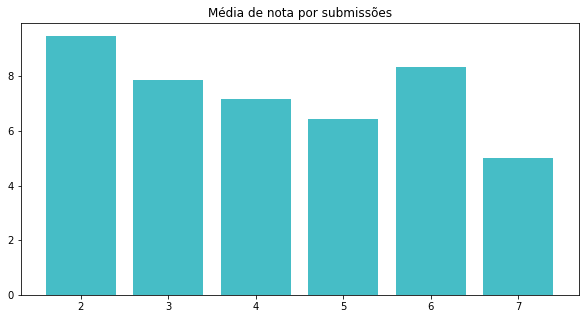

In [89]:
f, ax = plt.subplots(figsize=(10,5))
plt.bar(df_sub_ex['Submissões'], df_sub_ex['Média nota'], color = '#46bdc6')
plt.title('Média de nota por submissões')
plt.show()

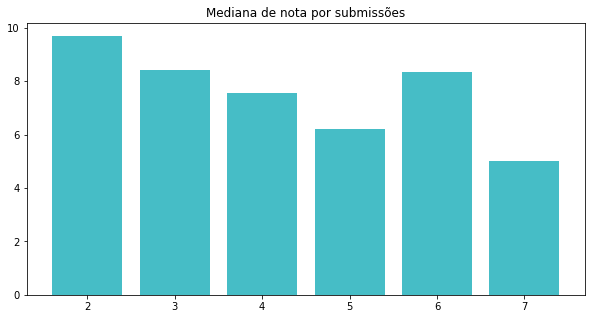

In [93]:
f, ax = plt.subplots(figsize=(10,5))
plt.bar(df_sub_ex['Submissões'], df_sub_ex['Mediana nota'], color = '#46bdc6')
plt.title('Mediana de nota por submissões')
plt.show()

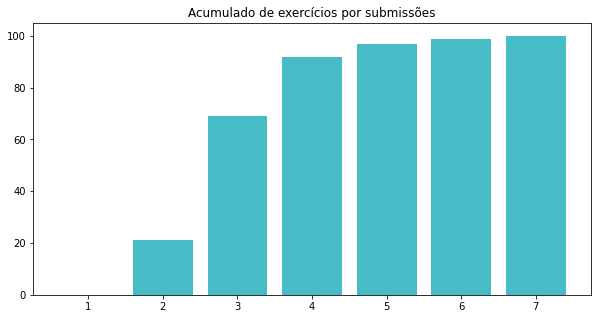

In [91]:
f, ax = plt.subplots(figsize=(10,5))
plt.bar(df_sub_ex['Submissões'], df_sub_ex['Porcentagem de exercícios'], color = '#46bdc6')
plt.title('Acumulado de exercícios por submissões')
plt.show()

#### Classificar pelo número de submissões

In [99]:
lista_dificuldades = [
    [ 'Fácil', ##1 a 2 submissões
     'Médio',  ##2 a 4 submissões
     'Difícil' ## 4 ou mais submissões
    ],
    #média de nota
    [
        df_ex.loc[df_ex['Média sub'] <= 2, 'Média nota'].mean(),
         df_ex.loc[(df_ex['Média sub'] <= 4) & (df_ex['Média sub'] > 2), 'Média nota'].mean(),
         df_ex.loc[ (df_ex['Média sub'] > 4), 'Média nota'].mean()
    ],
    #mediana de nota
    #[
     #   df_ex.loc[df_ex['Média sub'] <= 2, 'Média nota'].median(),
     #    df_ex.loc[(df_ex['Média sub'] <= 4) & (df_ex['Média sub'] > 2), 'Média nota'].median(),
     #    df_ex.loc[ (df_ex['Média sub'] > 4), 'Média nota'].median()
    #],
    #qtde de exercícios
    [
        df_ex.loc[df_ex['Média sub'] <= 2, 'Média nota'].count(),
         df_ex.loc[(df_ex['Média sub'] <= 4) & (df_ex['Média sub'] > 2), 'Média nota'].count(),
         df_ex.loc[(df_ex['Média sub'] > 4), 'Média nota'].count()
        
    ]
]
    
    
df_dificuldade = pd.DataFrame (lista_dificuldades).transpose()
df_dificuldade.columns = ['Dificuldade', 'Média nota', 'Número de exercícios'] 
df_dificuldade  
        

,Dificuldade,Média nota,Número de exercícios
0,Fácil,9.47381,21
1,Médio,7.63226,71
2,Difícil,6.724611,8


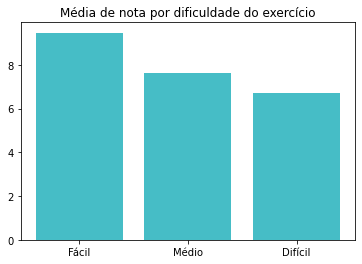

In [98]:
plt.bar(df_dificuldade['Dificuldade'], df_dificuldade['Média nota'], color = '#46bdc6')
plt.title('Média de nota por dificuldade do exercício')
plt.show()

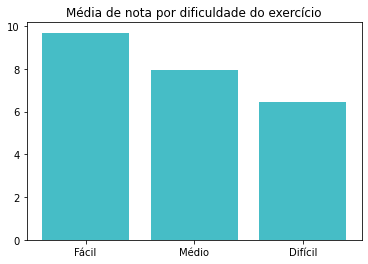

In [97]:
plt.bar(df_dificuldade['Dificuldade'], df_dificuldade['Mediana nota'], color = '#46bdc6')
plt.title('Média de nota por dificuldade do exercício')
plt.show()

In [36]:
#Classificação das dificuldades dos exercícios
classificacao = []
for row in df_ex['Média sub']:
    if 1 <= row <= 2: classificacao.append('Fácil')
    elif 2 <= row <= 4: classificacao.append('Médio')
    elif 4 <= row : classificacao.append('Difícil')
    else: classificacao.append('Erro')
df_ex.insert(13, 'dificuldade', classificacao, True) 

In [37]:
df_ex

,Ex,Freq sub,Média nota,Mediana nota,Moda nota,Média sub,vetor_matriz,funcao,in_out,repeticao,cond,conversao_var,teste,dificuldade,Mediana sub,Moda sub
0,operador resto da divisão,646,9.862776,10.0,10.0,1.500000,0,0,0,0,0,0,0,Fácil,1.0,1.0
1,ler número inteiro int e imprimir seu quadrado,430,9.950000,10.0,10.0,1.741860,0,0,1,0,1,0,0,Fácil,2.0,1.0
2,ler dois valores a e b e imprimir o quadrado d...,428,9.983452,10.0,10.0,1.467290,0,0,1,0,0,0,0,Fácil,1.0,1.0
3,ler dois valores inteiros int e imprimir sua ...,427,9.976303,10.0,10.0,1.414520,0,0,1,0,0,0,0,Fácil,1.0,1.0
4,ler dois inteiros e imprimir o maior,359,9.954674,10.0,10.0,1.685237,0,0,1,0,0,0,0,Fácil,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,15.2. dado n inteiro e x real computar aproxim...,7,9.690000,10.0,10.0,2.000000,0,0,1,0,1,0,0,Fácil,2.0,2.0
96,14.2. ler e imprimir um arquivo com matriz de ...,6,6.000000,10.0,10.0,2.666667,1,0,1,0,0,0,0,Médio,2.0,"[1.0, 2.0, 5.0]"
97,13.2. introdução às matrizes imprimir linhas e...,6,6.666667,10.0,10.0,6.000000,1,0,1,0,0,0,0,Difícil,2.5,2.0
98,11_saw.xlsx,4,5.000000,5.0,"[0.0, 10.0]",7.000000,0,0,0,0,0,0,0,Difícil,7.5,"[1.0, 4.0, 11.0, 12.0]"


### Vetores e Matrizes

In [100]:
df_ex_vetor = pd.DataFrame() 
df_ex_vetor = df_ex.loc[df_ex['vetor_matriz'] == 1]
df_ex_vetor = df_ex_vetor[['Ex', 'Freq sub', 'Média nota', 'Mediana nota', 'Moda nota', 'Média sub', 'Mediana sub', 'Moda sub', 'dificuldade']]
df_ex_vetor

,Ex,Freq sub,Média nota,Mediana nota,Moda nota,Média sub,Mediana sub,Moda sub,dificuldade
16,determinar se um vetor está em ordem crescente...,224,8.056244,10.000,10.0,3.459821,3.0,2.0,Médio
25,matrizes imprimir linhas e soma da linha,140,7.691176,10.000,10.0,3.950000,3.0,2.0,Médio
26,computando médias de colunas de matriz,139,8.365079,10.000,10.0,3.223022,2.0,2.0,Médio
28,dados dois vetores de flutuantes determinar su...,133,8.020000,10.000,10.0,3.849624,3.0,2.0,Médio
30,determinar conjunto de representantes de vetor,132,4.880481,4.645,0.0,4.628788,3.0,2.0,Difícil
36,ordenar os dados em um vetor usando o algoritm...,116,5.437333,6.360,10.0,3.698276,3.0,2.0,Médio
39,encontrar o elemento de maior valor em uma dad...,92,8.200952,10.000,10.0,3.326087,3.0,2.0,Médio
40,verificar se matriz é quadrado latino,90,7.499205,10.000,10.0,3.400000,3.0,2.0,Médio
43,determinar se um vetor está em ordem crescente,82,8.515190,10.000,10.0,3.024390,2.0,2.0,Médio
49,comparar ordem entre vetores v1 menor v2,65,9.064677,10.000,10.0,2.461538,2.0,2.0,Médio


In [101]:
df_ex_vetor.to_excel('vetor.xlsx')

### Funções

In [138]:
df_ex_vetor = pd.DataFrame() 
df_ex_vetor = df_ex.loc[df_ex['funcao'] == 1]
df_ex_vetor[['Ex', 'Freq sub', 'Média nota', 'Mediana nota', 'Moda nota', 'Média sub', 'Mediana sub', 'Moda sub', 'dificuldade']]

,Ex,Freq sub,Média nota,Mediana nota,Moda nota,Média sub,Mediana sub,Moda sub,dificuldade
9,funções introdução ao uso de funções somar int...,308,9.084175,10.00,10.0,2.685065,2.0,2.0,Médio
11,funções laço simples - cálculo de potência de ...,292,8.731115,10.00,10.0,2.698630,2.0,2.0,Médio
13,funções laço simples - descubra se um inteiro ...,271,8.862402,10.00,10.0,2.697417,2.0,2.0,Médio
35,funções laço simples - cálculo de fatorial com...,116,8.424159,10.00,10.0,2.137931,2.0,2.0,Médio
48,funções laço simples - gerar os n primeiros te...,68,8.924242,10.00,10.0,2.617647,2.0,2.0,Médio
75,função - obter a soma dos ímpares de cada subs...,29,7.827586,10.00,10.0,2.310345,2.0,2.0,Médio
90,função - determinar o comprimento da maior sub...,12,5.303636,6.11,10.0,3.000000,2.0,2.0,Médio


In [139]:
#df_ex_vetor = df_ex_vetor[['Ex', 'Freq sub']]
df_ex_vetor.to_excel('funcao.xlsx')

### Entrada e saída

In [140]:
df_ex_vetor = pd.DataFrame() 
df_ex_vetor = df_ex.loc[df_ex['in_out'] == 1]
df_ex_vetor[['Ex', 'Freq sub', 'Média nota', 'Mediana nota', 'Moda nota', 'Média sub', 'Mediana sub', 'Moda sub', 'dificuldade']]

,Ex,Freq sub,Média nota,Mediana nota,Moda nota,Média sub,Mediana sub,Moda sub,dificuldade
1,ler número inteiro int e imprimir seu quadrado,430,9.950000,10.00,10.0,1.741860,2.0,1.0,Fácil
2,ler dois valores a e b e imprimir o quadrado d...,428,9.983452,10.00,10.0,1.467290,1.0,1.0,Fácil
3,ler dois valores inteiros int e imprimir sua ...,427,9.976303,10.00,10.0,1.414520,1.0,1.0,Fácil
4,ler dois inteiros e imprimir o maior,359,9.954674,10.00,10.0,1.685237,2.0,2.0,Fácil
5,ler dois inteiros e trocar os conteúdos das va...,341,9.912643,10.00,10.0,1.604106,2.0,2.0,Fácil
10,ler dois inteiros e imprimir 1 se primeiro menor,294,9.910653,10.00,10.0,1.527211,1.0,1.0,Fácil
14,laço simples dado n determinar a soma dos n pr...,248,9.553761,10.00,10.0,1.939516,2.0,2.0,Fácil
15,ler um número inteiro int e imprimir este valor,247,8.840336,10.00,10.0,1.967611,2.0,2.0,Fácil
20,float dado n computar a soma dos n primeiros ...,173,9.329341,10.00,10.0,2.127168,2.0,2.0,Médio
22,laço duplo - dado n e k computar combinação de...,154,9.175811,10.00,10.0,2.584416,2.0,2.0,Médio


In [141]:
#df_ex_vetor = df_ex_vetor[['Ex', 'Freq sub']]
df_ex_vetor.to_excel('in_out.xlsx')

### Laços de repetição

In [142]:
df_ex_vetor = pd.DataFrame() 
df_ex_vetor = df_ex.loc[df_ex['repeticao'] == 1]
df_ex_vetor[['Ex', 'Freq sub', 'Média nota', 'Mediana nota', 'Moda nota', 'Média sub', 'Mediana sub', 'Moda sub', 'dificuldade']]

,Ex,Freq sub,Média nota,Mediana nota,Moda nota,Média sub,Mediana sub,Moda sub,dificuldade
8,laço - somatório dos primeiros naturais até um...,317,7.760912,10.00,10.0,2.943218,2.0,2.0,Médio
11,funções laço simples - cálculo de potência de ...,292,8.731115,10.00,10.0,2.698630,2.0,2.0,Médio
13,funções laço simples - descubra se um inteiro ...,271,8.862402,10.00,10.0,2.697417,2.0,2.0,Médio
14,laço simples dado n determinar a soma dos n pr...,248,9.553761,10.00,10.0,1.939516,2.0,2.0,Fácil
17,laço - soma dos números ímpares até digitar 0,222,9.318651,10.00,10.0,1.792793,2.0,1.0,Fácil
18,laço simples determinar se sequência finalizad...,214,7.542383,10.00,10.0,3.163551,2.0,2.0,Médio
21,laço - soma de positivos e negativos inteiros ...,164,9.204545,10.00,10.0,2.170732,2.0,2.0,Médio
22,laço duplo - dado n e k computar combinação de...,154,9.175811,10.00,10.0,2.584416,2.0,2.0,Médio
23,laço simples dado n determinar a soma dos n pr...,150,9.600694,10.00,10.0,2.273333,2.0,2.0,Médio
27,laço simples dado um numero decimal n determin...,134,9.526855,10.00,10.0,1.843284,2.0,2.0,Fácil


In [143]:
#df_ex_vetor = df_ex_vetor[['Ex', 'Freq sub']]
df_ex_vetor.to_excel('repet.xlsx')

### Laços condicionais

In [144]:
df_ex_vetor = pd.DataFrame() 
df_ex_vetor = df_ex.loc[df_ex['cond'] == 1]
df_ex_vetor[['Ex', 'Freq sub', 'Média nota', 'Mediana nota', 'Moda nota', 'Média sub', 'Mediana sub', 'Moda sub', 'dificuldade']]

,Ex,Freq sub,Média nota,Mediana nota,Moda nota,Média sub,Mediana sub,Moda sub,dificuldade
1,ler número inteiro int e imprimir seu quadrado,430,9.950000,10.000,10.0,1.741860,2.0,1.0,Fácil
7,seleções encaixadas ordenar decrescente 3 inte...,320,9.593291,10.000,10.0,2.078125,2.0,2.0,Médio
10,ler dois inteiros e imprimir 1 se primeiro menor,294,9.910653,10.000,10.0,1.527211,1.0,1.0,Fácil
12,soma de inteiros representando ângulos interno...,273,9.541985,10.000,10.0,2.036630,2.0,2.0,Médio
13,funções laço simples - descubra se um inteiro ...,271,8.862402,10.000,10.0,2.697417,2.0,2.0,Médio
16,determinar se um vetor está em ordem crescente...,224,8.056244,10.000,10.0,3.459821,3.0,2.0,Médio
18,laço simples determinar se sequência finalizad...,214,7.542383,10.000,10.0,3.163551,2.0,2.0,Médio
19,seleção - números pitagóricos - verificar teor...,199,9.544898,10.000,10.0,1.954774,2.0,2.0,Fácil
27,laço simples dado um numero decimal n determin...,134,9.526855,10.000,10.0,1.843284,2.0,2.0,Fácil
30,determinar conjunto de representantes de vetor,132,4.880481,4.645,0.0,4.628788,3.0,2.0,Difícil


In [145]:
#df_ex_vetor = df_ex_vetor[['Ex', 'Freq sub']]
df_ex_vetor.to_excel('cond.xlsx')

### Conversão de variável

In [146]:
df_ex_vetor = pd.DataFrame() 
df_ex_vetor = df_ex.loc[df_ex['conversao_var'] == 1]
df_ex_vetor[['Ex', 'Freq sub', 'Média nota', 'Mediana nota', 'Moda nota', 'Média sub', 'Mediana sub', 'Moda sub', 'dificuldade']]

,Ex,Freq sub,Média nota,Mediana nota,Moda nota,Média sub,Mediana sub,Moda sub,dificuldade
27,laço simples dado um numero decimal n determin...,134,9.526855,10.0,10.0,1.843284,2.0,2.0,Fácil
37,laço simples dado um numero decimal n determin...,108,8.801020,10.0,10.0,2.620370,2.0,2.0,Médio
60,7.1. string dada uma string de dígitos convert...,48,7.318182,10.0,10.0,3.125000,2.0,2.0,Médio
65,converter valor inteiro binário para decimal u...,42,8.119048,10.0,10.0,3.166667,3.0,2.0,Médio
71,converter valor inteiro decimal para binário u...,35,8.617647,10.0,10.0,4.028571,3.0,3.0,Difícil
80,pegar dígitos e montar natural a partir de st...,20,7.000000,10.0,10.0,2.400000,2.0,2.0,Médio
85,string dada uma string de dígitos converter pa...,16,6.363636,10.0,10.0,2.625000,2.0,"[1.0, 2.0]",Médio
94,pegar dígitos em n strings e montar inteiro as...,10,10.000000,10.0,10.0,2.200000,2.0,2.0,Médio


In [147]:
#df_ex_vetor = df_ex_vetor[['Ex', 'Freq sub']]
df_ex_vetor.to_excel('conv.xlsx')

### Teste

In [148]:
df_ex_vetor = pd.DataFrame() 
df_ex_vetor = df_ex.loc[df_ex['teste'] == 1]
df_ex_vetor[['Ex', 'Freq sub', 'Média nota', 'Mediana nota', 'Moda nota', 'Média sub', 'Mediana sub', 'Moda sub', 'dificuldade']]

,Ex,Freq sub,Média nota,Mediana nota,Moda nota,Média sub,Mediana sub,Moda sub,dificuldade
38,testar se caractere é letra se minúscula ou se...,93,8.076087,10.0,10.0,2.666667,2.0,2.0,Médio


In [149]:
#df_ex_vetor = df_ex_vetor[['Ex', 'Freq sub']]
df_ex_vetor.to_excel('teste.xlsx')

### Divisão dos anos

In [45]:
df

,Ano,Exercício,Id aluno,Nota,Número de submissões,vetor_matriz,funcao,in_out,repeticao,cond,conversao_var,teste
0,2022,13.2. introdução às matrizes imprimir linhas e...,1,0.00,5.0,1,0,1,0,0,0,0
1,2022,ler dois valores a e b e imprimir o quadrado d...,1,10.00,2.0,0,0,1,0,0,0,0
2,2022,11_saw.xlsx,1,10.00,1.0,0,0,0,0,0,0,0
3,2022,matrizes imprimir linhas e soma da linha,1,10.00,9.0,1,0,1,0,0,0,0
4,2022,computando médias de colunas de matriz,1,10.00,7.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11310,2020,verificar se matriz é quadrado latino,221,10.00,12.0,1,0,0,0,1,0,0
11311,2020,verificar se matriz é quadrado latino,222,5.62,1.0,1,0,0,0,1,0,0
11312,2020,verificar se matriz é quadrado latino,223,10.00,4.0,1,0,0,0,1,0,0
11313,2020,verificar se matriz é quadrado latino,250,10.00,7.0,1,0,0,0,1,0,0


In [46]:
#Média de nota
df_nota = df.groupby(['Exercício', 'Ano'])['Nota'].mean()
df_nota.columns = ['Exercício', 'Ano', 'Média nota']

#Média de submissões
df_sub = df.groupby(['Exercício', 'Ano'])['Número de submissões'].mean()
df_sub.columns = ['Exercício', 'Ano', 'Média submissões']


df_avg_subm = pd.concat([df_nota, df_sub], axis=1, join="inner")
df_avg_subm = df_avg_subm.reset_index()
df_avg_subm.columns = ['Ex', 'Ano', 'Média nota', 'Média submissões']

In [47]:
df_avg_subm

,Ex,Ano,Média nota,Média submissões
0,buscar naturais em vetor ordenado busca binária,2020,2.812500,2.250000
1,buscar naturais em vetor ordenado busca binária,2021,4.845000,2.000000
2,buscar naturais em vetor ordenado busca binária,2022,4.999459,4.609756
3,computando média de linhas de matriz,2020,9.357143,1.937500
4,computando média de linhas de matriz,2021,10.000000,2.000000
...,...,...,...,...
219,verificar se matriz é quadrado latino,2020,7.012500,3.648649
220,verificar se matriz é quadrado latino,2021,7.836154,3.226415
221,verificar se vetor de n inteiros é vetor de pe...,2020,6.728000,3.400000
222,verificar se vetor de n inteiros é vetor de pe...,2021,8.571429,2.571429


### 2020

In [156]:
df_2020 = df_avg_subm.loc[(df_avg_subm['Ano'] == 2020) & (df_avg_subm['Média submissões'] >= 1)]

#início de 2020
df_2020_init = df_2020.head(int(df_2020['Ex'].size/2))
#fim de 2020
df_2020_end = df_2020.tail(int(df_2020['Ex'].size/2))

In [157]:
lista_submissoes_2020 = [
    [2,  
     3,
     4,
     5,
     6,
     7
    ],
    [
        df_2020_init.loc[(df_2020_init['Média submissões'] <= 2), 'Média nota'].mean(),
        df_2020_init.loc[(df_2020_init['Média submissões'] <= 3) & (df_2020_init['Média submissões'] > 2), 'Média nota'].mean(),
        df_2020_init.loc[(df_2020_init['Média submissões'] <= 4) & (df_2020_init['Média submissões'] > 3), 'Média nota'].mean(),
        df_2020_init.loc[(df_2020_init['Média submissões'] <= 5) & (df_2020_init['Média submissões'] > 4), 'Média nota'].mean(),
        df_2020_init.loc[(df_2020_init['Média submissões'] <= 6) & (df_2020_init['Média submissões'] > 5), 'Média nota'].mean(),
        df_2020_init.loc[ (df_2020_init['Média submissões'] > 6), 'Média nota'].mean()
    ]]
df_2020_plot = pd.DataFrame (lista_submissoes_2020).transpose()
df_2020_plot.columns = ['Submissões', 'Média nota'] 
df_2020_plot  

,Submissões,Média nota
0,2.0,9.077848
1,3.0,7.838387
2,4.0,6.949204
3,5.0,6.189189
4,6.0,10.000000
5,7.0,NaN


In [158]:
lista_submissoes_2020 = [
    [2,  
     3,
     4,
     5,
     6,
     7
    ],
    [
        df_2020_end.loc[(df_2020_end['Média submissões'] <= 2), 'Média nota'].mean(),
        df_2020_end.loc[(df_2020_end['Média submissões'] <= 3) & (df_2020_end['Média submissões'] > 2), 'Média nota'].mean(),
        df_2020_end.loc[(df_2020_end['Média submissões'] <= 4) & (df_2020_end['Média submissões'] > 3), 'Média nota'].mean(),
        df_2020_end.loc[(df_2020_end['Média submissões'] <= 5) & (df_2020_end['Média submissões'] > 4), 'Média nota'].mean(),
        df_2020_end.loc[(df_2020_end['Média submissões'] <= 6) & (df_2020_end['Média submissões'] > 5), 'Média nota'].mean(),
        df_2020_end.loc[ (df_2020_end['Média submissões'] > 6), 'Média nota'].mean()
    ]]
df_2020_plot_end = pd.DataFrame (lista_submissoes_2020).transpose()
df_2020_plot_end.columns = ['Submissões', 'Média nota'] 
df_2020_plot_end

,Submissões,Média nota
0,2.0,9.583699
1,3.0,8.636279
2,4.0,7.334325
3,5.0,5.617663
4,6.0,NaN
5,7.0,NaN


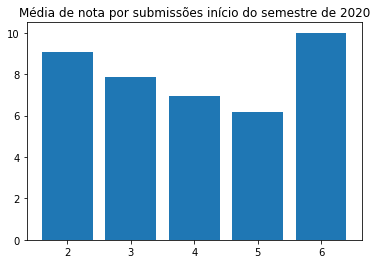

In [159]:
plt.bar(df_2020_plot['Submissões'], df_2020_plot['Média nota'])
plt.title('Média de nota por submissões início do semestre de 2020')
plt.show()

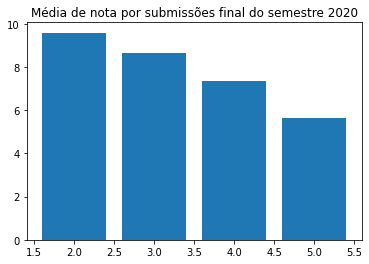

In [160]:
plt.bar(df_2020_plot_end['Submissões'], df_2020_plot_end['Média nota'])
plt.title('Média de nota por submissões final do semestre 2020')
plt.show()

### 2021

In [161]:
df_2021 = df_avg_subm.loc[(df_avg_subm['Ano'] == 2021) & (df_avg_subm['Média submissões'] >= 1)]
#início de 2021
df_2021_init = df_2021.head(int(df_2021['Ex'].size/2))
#fim de 2021
df_2021_end = df_2021.tail(int(df_2021['Ex'].size/2))

In [162]:
lista_submissoes_2021 = [
    [2,  
     3,
     4,
     5,
     6,
     7
    ],
    [
        df_2021_init.loc[(df_2021_init['Média submissões'] <= 2), 'Média nota'].mean(),
        df_2021_init.loc[(df_2021_init['Média submissões'] <= 3) & (df_2021_init['Média submissões'] > 2), 'Média nota'].mean(),
        df_2021_init.loc[(df_2021_init['Média submissões'] <= 4) & (df_2021_init['Média submissões'] > 3), 'Média nota'].mean(),
        df_2021_init.loc[(df_2021_init['Média submissões'] <= 5) & (df_2021_init['Média submissões'] > 4), 'Média nota'].mean(),
        df_2021_init.loc[(df_2021_init['Média submissões'] <= 6) & (df_2021_init['Média submissões'] > 5), 'Média nota'].mean(),
        df_2021_init.loc[ (df_2021_init['Média submissões'] > 6), 'Média nota'].mean()
    ]]
lista_submissoes_2021
df_2021_plot = pd.DataFrame (lista_submissoes_2021).transpose()
df_2021_plot.columns = ['Submissões', 'Média nota'] 
df_2021_plot

,Submissões,Média nota
0,2.0,8.969127
1,3.0,7.584613
2,4.0,7.527431
3,5.0,9.099912
4,6.0,NaN
5,7.0,NaN


In [163]:
lista_submissoes_2021 = [
    [2,  
     3,
     4,
     5,
     6,
     7
    ],
    [
        df_2021_end.loc[(df_2021_end['Média submissões'] <= 2), 'Média nota'].mean(),
        df_2021_end.loc[(df_2021_end['Média submissões'] <= 3) & (df_2021_end['Média submissões'] > 2), 'Média nota'].mean(),
        df_2021_end.loc[(df_2021_end['Média submissões'] <= 4) & (df_2021_end['Média submissões'] > 3), 'Média nota'].mean(),
        df_2021_end.loc[(df_2021_end['Média submissões'] <= 5) & (df_2021_end['Média submissões'] > 4), 'Média nota'].mean(),
        df_2021_end.loc[(df_2021_end['Média submissões'] <= 6) & (df_2021_end['Média submissões'] > 5), 'Média nota'].mean(),
        df_2021_end.loc[ (df_2021_end['Média submissões'] > 6), 'Média nota'].mean()
    ]]
lista_submissoes_2021
df_2021_plot_end = pd.DataFrame (lista_submissoes_2021).transpose()
df_2021_plot_end.columns = ['Submissões', 'Média nota'] 
df_2021_plot_end

,Submissões,Média nota
0,2.0,9.734507
1,3.0,7.801892
2,4.0,7.686969
3,5.0,NaN
4,6.0,NaN
5,7.0,NaN


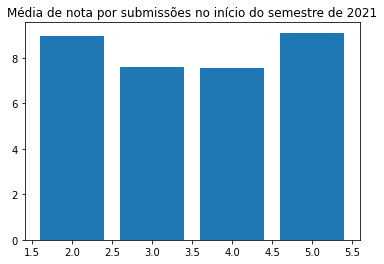

In [164]:
plt.bar(df_2021_plot['Submissões'], df_2021_plot['Média nota'])
plt.title('Média de nota por submissões no início do semestre de 2021')
plt.show()

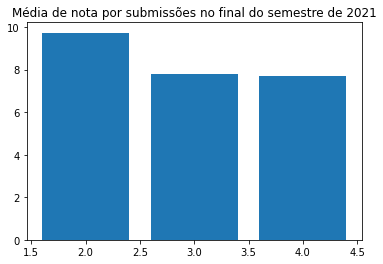

In [165]:
plt.bar(df_2021_plot_end['Submissões'], df_2021_plot_end['Média nota'])
plt.title('Média de nota por submissões no final do semestre de 2021')
plt.show()

### 2022

In [166]:
df_2022 = df_avg_subm.loc[(df_avg_subm['Ano'] == 2022) & (df_avg_subm['Média submissões'] >= 1)]
#início de 2022
df_2022_init = df_2022.head(int(df_2022['Ex'].size/2))
#fim de 2022
df_2022_end = df_2022.tail(int(df_2022['Ex'].size/2))

In [152]:
lista_submissoes_2022 = [
    [2,  
     3,
     4,
     5,
     6,
     7
    ],
    [
        df_2022_init.loc[(df_2022_init['Média submissões'] <= 2), 'Média nota'].mean(),
        df_2022_init.loc[(df_2022_init['Média submissões'] <= 3) & (df_2022_init['Média submissões'] > 2), 'Média nota'].mean(),
        df_2022_init.loc[(df_2022_init['Média submissões'] <= 4) & (df_2022_init['Média submissões'] > 3), 'Média nota'].mean(),
        df_2022_init.loc[(df_2022_init['Média submissões'] <= 5) & (df_2022_init['Média submissões'] > 4), 'Média nota'].mean(),
        df_2022_init.loc[(df_2022_init['Média submissões'] <= 6) & (df_2022_init['Média submissões'] > 5), 'Média nota'].mean(),
        df_2022_init.loc[ (df_2022_init['Média submissões'] > 6), 'Média nota'].mean()
    ]]
lista_submissoes_2022
df_2022_plot = pd.DataFrame (lista_submissoes_2022).transpose()
df_2022_plot.columns = ['Submissões', 'Média nota'] 
df_2022_plot

,Submissões,Média nota
0,2.0,9.265843
1,3.0,7.816428
2,4.0,6.320342
3,5.0,6.868431
4,6.0,6.666667
5,7.0,4.583333


In [153]:
lista_submissoes_2022 = [
    [2,  
     3,
     4,
     5,
     6,
     7
    ],
    [
        df_2022_end.loc[(df_2022_end['Média submissões'] <= 2), 'Média nota'].mean(),
        df_2022_end.loc[(df_2022_end['Média submissões'] <= 3) & (df_2022_end['Média submissões'] > 2), 'Média nota'].mean(),
        df_2022_end.loc[(df_2022_end['Média submissões'] <= 4) & (df_2022_end['Média submissões'] > 3), 'Média nota'].mean(),
        df_2022_end.loc[(df_2022_end['Média submissões'] <= 5) & (df_2022_end['Média submissões'] > 4), 'Média nota'].mean(),
        df_2022_end.loc[(df_2022_end['Média submissões'] <= 6) & (df_2022_end['Média submissões'] > 5), 'Média nota'].mean(),
        df_2022_end.loc[ (df_2022_end['Média submissões'] > 6), 'Média nota'].mean()
    ]]
lista_submissoes_2022
df_2022_plot_end = pd.DataFrame (lista_submissoes_2022).transpose()
df_2022_plot_end.columns = ['Submissões', 'Média nota'] 
df_2022_plot_end

,Submissões,Média nota
0,2.0,8.862181
1,3.0,7.820131
2,4.0,7.965784
3,5.0,7.410929
4,6.0,NaN
5,7.0,NaN


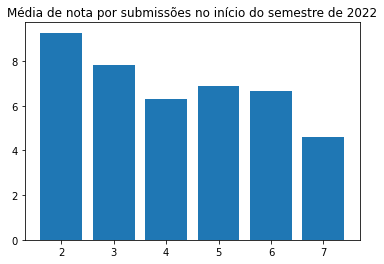

In [168]:
plt.bar(df_2022_plot['Submissões'], df_2022_plot['Média nota'])
plt.title('Média de nota por submissões no início do semestre de 2022')
plt.show()

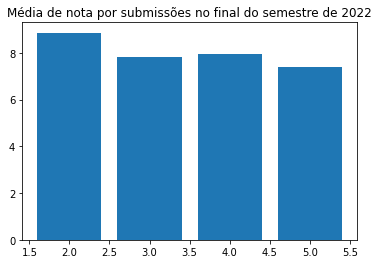

In [155]:
plt.bar(df_2022_plot_end['Submissões'], df_2022_plot_end['Média nota'])
plt.title('Média de nota por submissões no final do semestre de 2022')
plt.show()

In [169]:
lista_submissoes_2022 = [
    [2,  
     3,
     4,
     5,
     6,
     7
    ],
    [
        df_2022.loc[(df_2022['Média submissões'] <= 2), 'Média nota'].mean(),
        df_2022.loc[(df_2022['Média submissões'] <= 3) & (df_2022['Média submissões'] > 2), 'Média nota'].mean(),
        df_2022.loc[(df_2022['Média submissões'] <= 4) & (df_2022['Média submissões'] > 3), 'Média nota'].mean(),
        df_2022.loc[(df_2022['Média submissões'] <= 5) & (df_2022['Média submissões'] > 4), 'Média nota'].mean(),
        df_2022.loc[(df_2022['Média submissões'] <= 6) & (df_2022['Média submissões'] > 5), 'Média nota'].mean(),
        df_2022.loc[ (df_2022['Média submissões'] > 6), 'Média nota'].mean()
    ]]
lista_submissoes_2022
df_2022_plot = pd.DataFrame (lista_submissoes_2022).transpose()
df_2022_plot.columns = ['Submissões', 'Média nota'] 
df_2022_plot

,Submissões,Média nota
0,2.0,8.968408
1,3.0,7.827556
2,4.0,6.908000
3,5.0,7.139680
4,6.0,6.666667
5,7.0,4.583333


In [174]:
lista_submissoes_2021 = [
    [2,  
     3,
     4,
     5,
     6,
     7
    ],
    [
        df_2021.loc[(df_2021['Média submissões'] <= 2), 'Média nota'].mean(),
        df_2021.loc[(df_2021['Média submissões'] <= 3) & (df_2021['Média submissões'] > 2), 'Média nota'].mean(),
        df_2021.loc[(df_2021['Média submissões'] <= 4) & (df_2021['Média submissões'] > 3), 'Média nota'].mean(),
        df_2021.loc[(df_2021['Média submissões'] <= 5) & (df_2021['Média submissões'] > 4), 'Média nota'].mean(),
        df_2021.loc[(df_2021['Média submissões'] <= 6) & (df_2021['Média submissões'] > 5), 'Média nota'].mean(),
        df_2021.loc[ (df_2021['Média submissões'] > 6), 'Média nota'].mean()
    ]]
lista_submissoes_2021
df_2021_plot = pd.DataFrame (lista_submissoes_2021).transpose()
df_2021_plot.columns = ['Submissões', 'Média nota'] 
df_2021_plot

,Submissões,Média nota
0,2.0,9.466624
1,3.0,7.721106
2,4.0,7.575293
3,5.0,9.099912
4,6.0,NaN
5,7.0,NaN


In [177]:
lista_submissoes_2020 = [
    [2,  
     3,
     4,
     5,
     6,
     7
    ],
    [
        df_2020.loc[(df_2020['Média submissões'] <= 2), 'Média nota'].mean(),
        df_2020.loc[(df_2020['Média submissões'] <= 3) & (df_2020['Média submissões'] > 2), 'Média nota'].mean(),
        df_2020.loc[(df_2020['Média submissões'] <= 4) & (df_2020['Média submissões'] > 3), 'Média nota'].mean(),
        df_2020.loc[(df_2020['Média submissões'] <= 5) & (df_2020['Média submissões'] > 4), 'Média nota'].mean(),
        df_2020.loc[(df_2020['Média submissões'] <= 6) & (df_2020['Média submissões'] > 5), 'Média nota'].mean(),
        df_2020.loc[ (df_2020['Média submissões'] > 6), 'Média nota'].mean()
    ]]
lista_submissoes_2020
df_2020_plot = pd.DataFrame (lista_submissoes_2020).transpose()
df_2020_plot.columns = ['Submissões', 'Média nota'] 
df_2020_plot

,Submissões,Média nota
0,2.0,9.353767
1,3.0,8.227603
2,4.0,7.132595
3,5.0,5.808172
4,6.0,10.000000
5,7.0,NaN


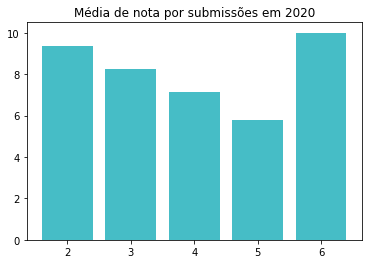

In [184]:
plt.bar(df_2020_plot['Submissões'], df_2020_plot['Média nota'], color = '#46bdc6')
plt.title('Média de nota por submissões em 2020')
plt.show()

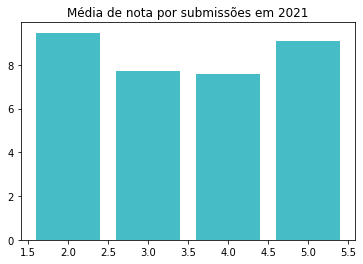

In [185]:
plt.bar(df_2021_plot['Submissões'], df_2021_plot['Média nota'], color = '#46bdc6')
plt.title('Média de nota por submissões em 2021')
plt.show()

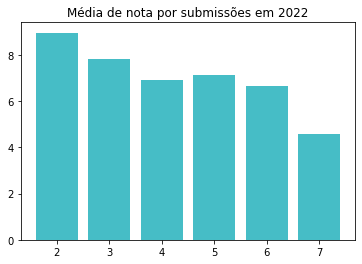

In [186]:
plt.bar(df_2022_plot['Submissões'], df_2022_plot['Média nota'], color = '#46bdc6')
plt.title('Média de nota por submissões em 2022')
plt.show()

<BarContainer object of 88 artists>

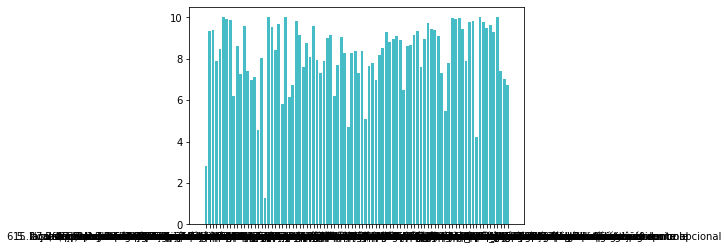

In [187]:
plt.bar(df_2020['Ex'], df_2020['Média nota'], color = '#46bdc6')

<BarContainer object of 61 artists>

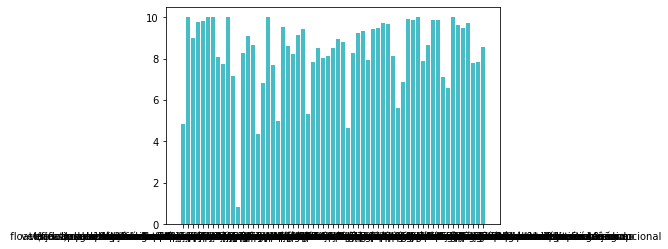

In [188]:
plt.bar(df_2021['Ex'], df_2021['Média nota'], color = '#46bdc6')

<BarContainer object of 71 artists>

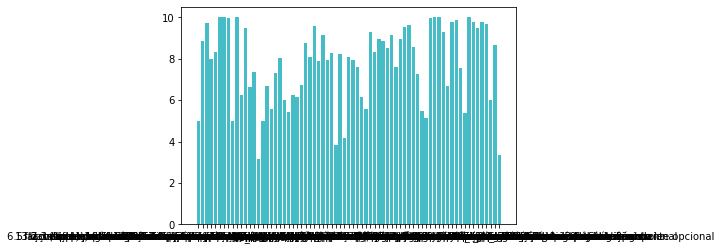

In [189]:
plt.bar(df_2022['Ex'], df_2022['Média nota'], color = '#46bdc6')

In [181]:
print('Média nota 2020: ', df_2020['Média nota'].mean(), 
      '\nMédia nota 2021: ',  df_2021['Média nota'].mean(), 
      '\nMédia nota 2022: ', df_2022['Média nota'].mean())

Média nota 2020:  8.185495160075464 
Média nota 2021:  8.314709696454338 
Média nota 2022:  7.785666007075963


In [182]:
print('Média submissões 2020: ', df_2020['Média submissões'].mean(), 
      '\nMédia submissões 2021: ',  df_2021['Média submissões'].mean(), 
      '\nMédia submissões 2022: ', df_2022['Média submissões'].mean())

Média submissões 2020:  2.6064786925899117 
Média submissões 2021:  2.4933006313929225 
Média submissões 2022:  2.8480646759249515


In [196]:
print('Média submissões 2020: ', df_2020['Média submissões'].unique().size, 
      '\nMédia submissões 2021: ',  df_2021['Média submissões'].unique().size, 
      '\nMédia submissões 2022: ', df_2022['Média submissões'].unique().size)

Média submissões 2020:  82 
Média submissões 2021:  58 
Média submissões 2022:  62


In [212]:
lista_2020 = [
    [2,  
     3,
     4,
     5,
     6,
     7
    ],
    [
        df_2020.loc[(df_2020['Média submissões'] <= 2), 'Média nota'].count(),
        df_2020.loc[(df_2020['Média submissões'] <= 3) & (df_2020['Média submissões'] > 2), 'Média nota'].count(),
        df_2020.loc[(df_2020['Média submissões'] <= 4) & (df_2020['Média submissões'] > 3), 'Média nota'].count(),
        df_2020.loc[(df_2020['Média submissões'] <= 5) & (df_2020['Média submissões'] > 4), 'Média nota'].count(),
        df_2020.loc[(df_2020['Média submissões'] <= 6) & (df_2020['Média submissões'] > 5), 'Média nota'].count(),
        df_2020.loc[ (df_2020['Média submissões'] > 6), 'Média submissões'].count()
    ]]
lista_2020
df_2020_sub = pd.DataFrame (lista_2020).transpose()
df_2020_sub.columns = ['Submissões', 'Média nota'] 
df_2020_sub

,Submissões,Média nota
0,2,22
1,3,41
2,4,21
3,5,3
4,6,1
5,7,0


In [213]:
lista_2021 = [
    [2,  
     3,
     4,
     5,
     6,
     7
    ],
    [
        df_2021.loc[(df_2021['Média submissões'] <= 2), 'Média nota'].count(),
        df_2021.loc[(df_2021['Média submissões'] <= 3) & (df_2021['Média submissões'] > 2), 'Média nota'].count(),
        df_2021.loc[(df_2021['Média submissões'] <= 4) & (df_2021['Média submissões'] > 3), 'Média nota'].count(),
        df_2021.loc[(df_2021['Média submissões'] <= 5) & (df_2021['Média submissões'] > 4), 'Média nota'].count(),
        df_2021.loc[(df_2021['Média submissões'] <= 6) & (df_2021['Média submissões'] > 5), 'Média nota'].count(),
        df_2021.loc[ (df_2021['Média submissões'] > 6), 'Média submissões'].count()
    ]]
lista_2021
df_2021_sub = pd.DataFrame (lista_2021).transpose()
df_2021_sub.columns = ['Submissões', 'Média nota'] 
df_2021_sub

,Submissões,Média nota
0,2,20
1,3,29
2,4,10
3,5,2
4,6,0
5,7,0


In [214]:
lista_2022 = [
    [2,  
     3,
     4,
     5,
     6,
     7
    ],
    [
        df_2022.loc[(df_2022['Média submissões'] <= 2), 'Média nota'].count(),
        df_2022.loc[(df_2022['Média submissões'] <= 3) & (df_2022['Média submissões'] > 2), 'Média nota'].count(),
        df_2022.loc[(df_2022['Média submissões'] <= 4) & (df_2022['Média submissões'] > 3), 'Média nota'].count(),
        df_2022.loc[(df_2022['Média submissões'] <= 5) & (df_2022['Média submissões'] > 4), 'Média nota'].count(),
        df_2022.loc[(df_2022['Média submissões'] <= 6) & (df_2022['Média submissões'] > 5), 'Média nota'].count(),
        df_2022.loc[ (df_2022['Média submissões'] > 6), 'Média submissões'].count()
    ]]
lista_2022
df_2022_sub = pd.DataFrame (lista_2022).transpose()
df_2022_sub.columns = ['Submissões', 'Média nota'] 
df_2022_sub

,Submissões,Média nota
0,2,19
1,3,29
2,4,14
3,5,6
4,6,1
5,7,2
